In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
train_set = pd.read_csv('adult.data', header = None,na_values=' ?')
test_set = pd.read_csv('adult.test', skiprows = 1, header = None,na_values=' ?')
col_labels = ['age', 'workclass', 'fnlwgt', 'education',
'education_num','marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [10]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  wage_class      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [12]:
train_set['wage_class']=np.where(train_set['wage_class']==' <=50K',0,1)
test_set['wage_class']=np.where(test_set['wage_class']==' <=50K.',0,1)

In [13]:
train_set.wage_class.value_counts()

0    24720
1     7841
Name: wage_class, dtype: int64

In [14]:
test_set.wage_class.value_counts()

0    12435
1     3846
Name: wage_class, dtype: int64

In [15]:
for col in train_set.columns:
    print(train_set[col].value_counts())
    print('-----')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64
-----
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
-----
164190    13
203488    13
123011    13
113364    12
121124    12
          ..
284211     1
312881     1
177711     1
179758     1
229376     1
Name: fnlwgt, Length: 21648, dtype: int64
-----
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
-----
9

In [16]:
train_set.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
wage_class           0
dtype: int64

In [17]:
train_set.fillna(' Unknown',inplace=True)

In [18]:
train_set.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [19]:
ratio_of_earning=1-(train_set[train_set['wage_class']==0]['native_country'].value_counts()/train_set.native_country.value_counts())

In [20]:
train_set['Country_proba']=train_set.native_country.map(ratio_of_earning)

In [21]:
train_set

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class,Country_proba
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,0.245835
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,0.245835
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,0.245835
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,0.245835
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,0.263158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,0.245835
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,0.245835
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,0.245835
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,0.245835


In [22]:
country_dict=dict(ratio_of_earning)

In [23]:
x_train=train_set.drop(['wage_class'],axis=1)
y_train=train_set['wage_class']

In [7]:
x_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


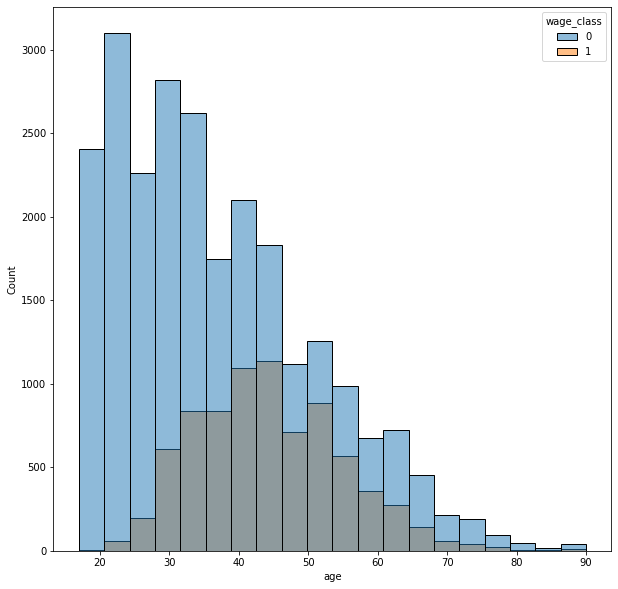

In [8]:
plt.figure(figsize=(10,10))
sns.histplot(x='age',data=train_set,hue='wage_class',bins=20)

In [18]:
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import *
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer

In [19]:
transform=[('ohe',OneHotEncoder(),[1,5,6,8,9]),('MinMax',MinMaxScaler(),[0,2,4,10,11,12,14])]
Transformer=ColumnTransformer(transformers=transform,remainder='drop')

In [24]:
steps=[('impute',SimpleImputer(strategy='constant',fill_value=' Unknown')),('tfr',Transformer),('model',XGBClassifier(learning_rate= 0.5, max_depth= 4, n_estimators=25,use_label_encoder=False,scale_pos_weight=3))]

In [25]:
clf_pipe=Pipeline(steps=steps)

In [27]:
cv=RepeatedStratifiedKFold( n_splits=10, n_repeats=5)
scores=cross_val_score(estimator=clf_pipe,X=x_train,y=y_train,cv=cv,scoring='f1_micro')

[11:06:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:06:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:06:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:06:31] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[11:06:56] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:06:57] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:06:57] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:06:58] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [28]:
np.mean(scores)



0.8323393273531436

In [29]:
clf_pipe.fit(x_train,y_train)

[11:07:23] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('impute',
                 SimpleImputer(fill_value=' Unknown', strategy='constant')),
                ('tfr',
                 ColumnTransformer(transformers=[('ohe', OneHotEncoder(),
                                                  [1, 5, 6, 8, 9]),
                                                 ('MinMax', MinMaxScaler(),
                                                  [0, 2, 4, 10, 11, 12, 14])])),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.5,
                               max_delta_step=0, max_depth=4,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=25,
     

In [33]:
test_set.native_country.fillna(' Unknown',inplace=True)

In [34]:
import joblib

In [99]:
cl=list(test_set.columns)[:-2]
cl

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country']

In [100]:
file_name='XGB.sav'
joblib.dump(clf_pipe,file_name)
dict_name='dict.sav'
joblib.dump(country_dict,dict_name)
col_names='col.sav'
joblib.dump(cl,col_names)

['col.sav']

In [81]:
model=joblib.load(file_name)

In [82]:
dictionary=joblib.load(dict_name)

In [38]:
test_set['Country_proba']=test_set.native_country.map(dictionary)

In [39]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class,Country_proba
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,0.245835
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,0.245835
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1,0.245835
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1,0.245835
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0,0.245835


In [32]:
test_set.iloc[2].values

array([28, ' Local-gov', 336951, ' Assoc-acdm', 12, ' Married-civ-spouse',
       ' Protective-serv', ' Husband', ' White', ' Male', 0, 0, 40,
       ' United-States', 1], dtype=object)

In [41]:
x_test=test_set.drop('wage_class',axis=1)
y_test=test_set.wage_class

In [42]:
y_pred=model.predict(x_test)

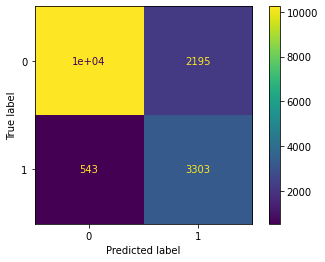

In [43]:
con=confusion_matrix(y_test
                     ,y_pred)
ConfusionMatrixDisplay(con).plot()

In [44]:
roc_auc_score(y_test,y_pred)

0.8411482297651375

In [109]:
clf_pipe.score(x_train,y_train)

0.8399619176315224

In [45]:
clf_pipe.score(x_test,y_test)

0.8318285117621768

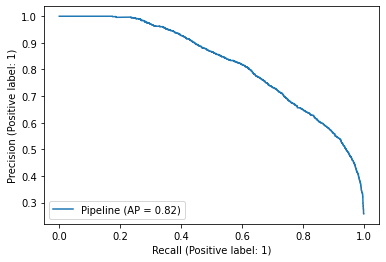

In [46]:
plot_precision_recall_curve(model,x_test,y_test)

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88     12435
           1       0.60      0.86      0.71      3846

    accuracy                           0.83     16281
   macro avg       0.78      0.84      0.79     16281
weighted avg       0.87      0.83      0.84     16281



In [91]:
a=list(test_set.drop(['wage_class','Country_proba'],axis=1).iloc[0])
a

[25,
 ' Private',
 226802,
 ' 11th',
 7,
 ' Never-married',
 ' Machine-op-inspct',
 ' Own-child',
 ' Black',
 ' Male',
 0,
 0,
 40,
 ' United-States']

In [101]:
clmns=joblib.load(col_names)

In [102]:
clmns

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country']

In [103]:
df_test=pd.DataFrame([a],columns=clmns)

In [104]:
df_test

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States


In [105]:
df_test['Country_proba']=df_test.native_country.map(dictionary)

In [106]:
df_test

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,Country_proba
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0.245835


In [108]:
model.predict(df_test)[0]

0

In [29]:
test_set.iloc[2].values

array([28, ' Local-gov', 336951, ' Assoc-acdm', 12, ' Married-civ-spouse',
       ' Protective-serv', ' Husband', ' White', ' Male', 0, 0, 40,
       ' United-States', 1], dtype=object)